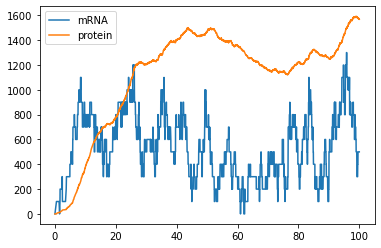

In [28]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 3
Gamma1 = 1/2
beta = 10
Gamma2 = 1/30

N_m = 0
N_p = 0


produce_m = lambda: alpha
degrade_m = lambda N: Gamma1*N
produce_p = lambda N: beta*N
degrade_p = lambda N: Gamma2*N


def Gillespie(N_m, N_p, t_max):
    t = 0
    
    ts = [t]
    N_ms = [N_m]
    N_ps = [N_p]
    while t < t_max:
        P = (produce_m() + degrade_m(N_m) + produce_p(N_m) + degrade_p(N_p))
        dt = np.random.exponential(1/P)
        t += dt
        ts.append(t)
        
        choose = np.random.choice([0,1,2,3], p = np.array([produce_m(), degrade_m(N_m), produce_p(N_m), degrade_p(N_p)])/P)

        if choose == 0:
            N_m += 1
        elif choose == 1:
            N_m -= 1
        elif choose == 2:
            N_p += 1
        elif choose == 3:
            N_p -= 1

        N_ms.append(N_m)
        N_ps.append(N_p)

    plt.plot(ts, np.array(N_ms)*100, label = 'mRNA')
    plt.plot(ts, N_ps, label = 'protein')
    plt.legend()
Gillespie(N_m, N_p, 100)
